# Review of material
This project is about linear and nonlinear regression.

Consider the case where  the label for instance $i$ is given by the linear product ${\bf w}^T {\bf x}_i $, with the bias $b$, and noise ${\epsilon}_i$ (recall we discussed that noise was the reason that one feature vector may have more than one distinct label):

$$
y_i = {\bf w}^T {\bf x}_i  + b + {\epsilon}_i ~~~~ {\text for} ~~ i=1, \cdots, N
~~~ (\ddagger) $$
where  $\epsilon_i \sim N(0, \sigma^2)$. We also saw that we can include the bias term into the feature vector as a $1$, and then $b=w_0$
$$
{\bf x}  \leftarrow  \begin{bmatrix}
                     1 \\
                     {\bf x}
                     \end{bmatrix}
$$
$$
{\bf w}  \leftarrow  \begin{bmatrix}
                     b\\
                     {\bf w}
                     \end{bmatrix}
$$
thus simplifying the first expression to
$$
y_i = {\bf w}^T {\bf x}_i  + {\epsilon}_i ~~~~ {\text for} ~~ i=1, \cdots, N
$$
For the training set $D = \{ ( {\bf x}_1, y_1), ( {\bf x}_2, y_2), \cdots,  ( {\bf x}_N, y_N) \}$  the MMSE cost function which we want to minimize is
$$
J_{MSE}({\bf w}) = 1/N \sum_{i=1}^N ({\bf w}^T{\bf x}_i - y_i)^2
$$
and the maximum likelihood estimate of ${\bf w}$ given the training set $D$ can be written as
$$
\hat{\bf w}_{MMSE} = \underset{\bf w}{argmin} ~ J_{MSE}({\bf w})
$$
therefore to find $\hat{\bf w}_{ML}$ in closed form, we can simply take the derivative

$$
\begin{align}
\nabla J_{MSE}({\bf w}) &= \nabla J_{MSE}(\left.w_{1}, w_{2}, \ldots, w_{d+1}\right) \\
\\
&=\left[\begin{array}{c}
\dfrac{\partial J_{MSE}}{\partial w_0}(\left.w_{1}, w_{2}, \ldots, w_{d+1}\right)\\
\dfrac{\partial J_{MSE}}{\partial w_1}(\left.w_{1}, w_{2}, \ldots, w_{d+1}\right) \\
\vdots \\
\dfrac{\partial J_{MSE}}{\partial w_{d}}(\left.w_{1}, x_{2}, \ldots, w_{d+1}\right)
\end{array}\right] \\ \\
 & = 1/N \sum_{i=1}^N {\bf x}_i ({\bf x}_i^T {\bf w}- y_i)\\
\end{align}
$$
where $\nabla J_{MSE}({\bf w})$ is the gradient of likelihood function $J_{MSE}({\bf w})$.  Next, we set $\nabla J_{MSE}({\bf w}) = 0$,  and finally  solve for ${\bf w}_{MMSE}$ from the resulting equation.

$\color{red}{\text{Here are these three steps:
Using the matrix } X, \text{which holds all the feature vectors transposed}}$
$$\color{red}{{\bf X} = \left[ \begin{array}
          . {\bf x}^T_1\\
          {\bf x}^T_2\\
          \vdots\\
   {\bf x}^T_N
   \end{array} \right] }$$
$\color{red}{\text{and}}$
$$\color{red}{
{\bf y} = [y_1, y_2, \cdots, y_N]^T }
$$

$\color{red}{\text{we can write our MSE cost function as the scalar}}$
$$\color{red}{ \begin{align}
J_{MSE} &= ||X {\bf w} - {\bf y}||^2 \\
        &=(X {\bf w} - {\bf y})^T (X {\bf w} - {\bf y})\\
        &={\bf w}^T X^T X {\bf w}-{\bf w}^T X^T  {\bf y}- {\bf y}^T X {\bf w}+{\bf y}^T {\bf y} \\
      \end{align}}
$$
$\color{red}{\text{Each of these terms is a scalar, so each of them is equal to its own transpose. This allows us to simplify:}}$
$$\color{red}{ \begin{align}
J_{MSE} &={\bf w}^T X^T X {\bf w}-2 {\bf y}^T X {\bf w}+{\bf y}^T {\bf y} \\
      \end{align}}
$$
$\color{red}{\text{Now, take the derivative with respect to } {\bf w:}}$
$$\color{red}{ \begin{align}
\nabla_{{\bf w}} J_{MSE} &= \frac{\partial ~{\bf w}^T X^T X {\bf w}-2 {\bf y}^T X {\bf w}+{\bf y}^T {\bf y}}{\partial {\bf w}} \\
 &= 2 X^T X {\bf w} -2 X^T {\bf y} + 0\\
      \end{align}}
$$
$\color{red}{\text{You can find these gradient formulas in our resource pages on page 3. Finally, we just set this to zero and solve for the weight vector:}}$
$$\color{red}{ \begin{align}
\nabla_{{\bf w}} J_{MSE} &= 2 X^T X {\bf w}_{MMSE} -2 X^T {\bf y} =0\\
\Rightarrow~~~~ & ~~~~~~~~~~~~~~~~~~~~2 X^T X {\bf w}_{MMSE} = 2 X^T {\bf y} \\
\Rightarrow~~~~ &~~~~~~~~~~~~~~~~~~~~~~X^T X {\bf w}_{MMSE} =  X^T {\bf y} \\
\Rightarrow~~~~ &~~~~~~(X^T X)^{-1}X^T X {\bf w}_{MMSE} = (X^T X)^{-1} X^T {\bf y} \\
\Rightarrow~~~~ &~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{\bf w}_{MMSE} = (X^T X)^{-1} X^T {\bf y} \\
      \end{align}}
$$

Which proves what we saw in class: the closed-form solution can be written as follows
$$
\bf w_{MMSE} = ({\bf X}^T {\bf X})^{-1}{\bf X}^T{\bf y}
$$

As we discussed in class, for any reasonable size $d$, it is less computationally expensive to employ the gradient descent algorithm. In future we use the gradient in a gradient descent algorithm to find $\bf w_{MMSE}$.


## We generate a data set with linear dependency here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
N = 100
b = 3.2
a = 2.5
x = np.random.normal(0, 10, N)           # creates feature vectors without bias
y = a*x + b + np.random.normal(0, 5, N)  # this is (double-dagger) equation from above to get labels



**Without looking at the data yet, we set aside 20% of the data as test data. The rest is used as training data.**

Text(0.5, 1.0, 'training data ')

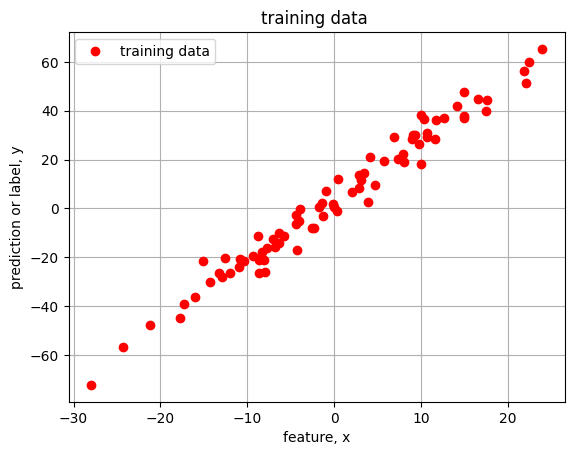

In [ ]:
N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_tst= x[N_tr:]
y_tst = y[N_tr:]
# Next, we only view the training data, leaving the test data untouched and unseen.
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.grid()
plt.legend()
plt.xlabel('feature, x')
plt.ylabel('prediction or label, y')
plt.title('training data ')

**Change of variable:** Here we insert the bias term into the feature vector.

$$
{\bf x}  \leftarrow  \begin{bmatrix}
                     1 \\
                     {\bf x}
                     \end{bmatrix}
$$

In [ ]:
X = np.vstack(( np.ones(N_tr), x_tr ))
X = np.transpose(X)

Now we obtain  ${\bf w}_{MMSE}$ by using the closed-form solution:
$$
\hat{\bf w}_{MMSE} = ({\bf X}^T {\bf X})^{-1}{\bf X}^T{\bf y}
$$

In [ ]:
w_ml = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)) , np.matmul(np.transpose(X),y_tr))

**Let us plot the line we found, training data and test data**

Text(0.5, 1.0, 'training data and MMSE estimate of the line describing the data')

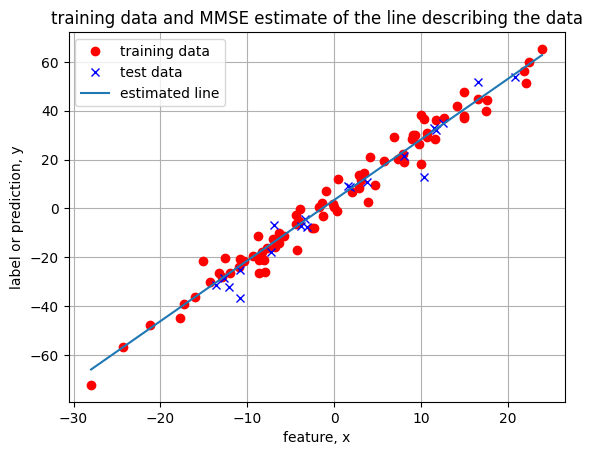

In [ ]:
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy = w_ml[1]* xx + w_ml[0]
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('feature, x')
plt.ylabel('label or prediction, y')
plt.title('training data and MMSE estimate of the line describing the data')

**Now let us calculate the average error, $\epsilon$,  of the estimate for the training set and test set**

The error can be written as
$$
\epsilon = 1/N \sum_{i=1}^N ({\bf w}_{MMSE}^T{\bf x}_i - y_i)^2
$$


In [ ]:
X_tr = np.vstack((np.ones(len(x_tr)), x_tr))
X_tr = np.transpose(X_tr)
X_tst = np.vstack((np.ones(len(x_tst)), x_tst))
X_tst = np.transpose(X_tst)
training_error = np.mean(np.square(np.matmul(X_tr,w_ml) - y_tr))
test_error = np.mean(np.square(np.matmul(X_tst,w_ml) - y_tst))
print('Error_training_data = ', training_error)
print('Error_Test_data = ', test_error)
print(X_tr.shape)

Error_training_data =  21.990790589492953
Error_Test_data =  30.27112482314451
(80, 2)


***
***

# Project 6 Description
The goal of this problem is to extend the linear regression and find a higher order polynomial fit for the given data. In the following we first describe the problem and then show an analytical solution. Then we generate the training data and the we state the problem.

## Linear estimation for nonlinear cases
Assume that  the best fit for
the training set $D = \{ ( { x}_1, y_1), ( { x}_2, y_2), \cdots,  ( { x}_N, y_N) \}$ is the $p$-order polynomial

$$
y_ i = a_0 + a_1 x_i + a_2 x_i^2 + \cdots + a_p x_i^p
$$

We define our feature vector:
$$
{\bf x}  =           \begin{bmatrix}
                     {1} \\
                     x \\
                     x^2 \\
                     \vdots \\
                     x^p \\
                     \end{bmatrix}
$$
Therefore, for every value of $x_i$ in our training data set we can generate a vector

$$
{\bf x}_i  =           \begin{bmatrix}
                     {1} \\
                     x_i \\
                     x_i^2 \\
                     \vdots \\
                     x_i^p \\
                     \end{bmatrix}
$$

We still use the same definition for ${\bf X}$ and for ${\bf y}$  as we did above.

Then your closed-form solution should be exactly to the one we expressed above, i.e. we get

$$
{\bf w}_{MMSE} = ({\bf X}^T {\bf X})^{-1}{\bf X}^T{\bf y}
$$

**First we generate the training data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
N = 100
b = 3.2
a3 = -0.2
a2 = 0.2
a1 = -1
x = np.random.normal(0, 3, N)
p = 3
X = np.ones(N)
for i in np.arange(p):
  X = np.vstack((X, np.power(x , i+1)))
w = np.array([b, a1, a2, a3])
y = np.matmul(w,X) + np.random.normal(0, 10, N)
X=np.transpose(X)


**We set aside 20% of the data as test data.**


(80,)


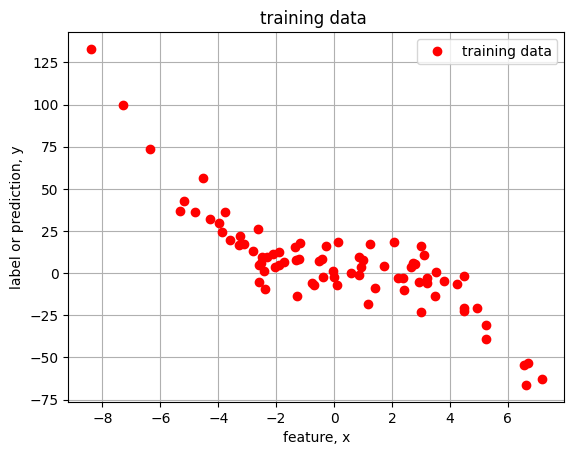

In [ ]:
N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_tst= x[N_tr:]
y_tst = y[N_tr:]
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.grid()
plt.legend()
plt.xlabel('feature, x')
plt.ylabel('label or prediction, y')
plt.title('training data ')
print(y_tr.shape)

## Problem 1 [4 points]
Use polynomial dregrees $p=2, 3, 4$, and $10$ to find the best fit for the generated data. Follow the procedure shown for the linear case to calculate the error for each case for the training data and for the test data.

## Problem 2 [1 point]
Please, compare the four results and explain which $p$ degree would be best to use. Justify your answer.

w_ml:  [ 1.83781215 -6.91062397  0.35446596]
Error_training_data =  256.2163608034787
Error_Test_data =  231.93440199462097


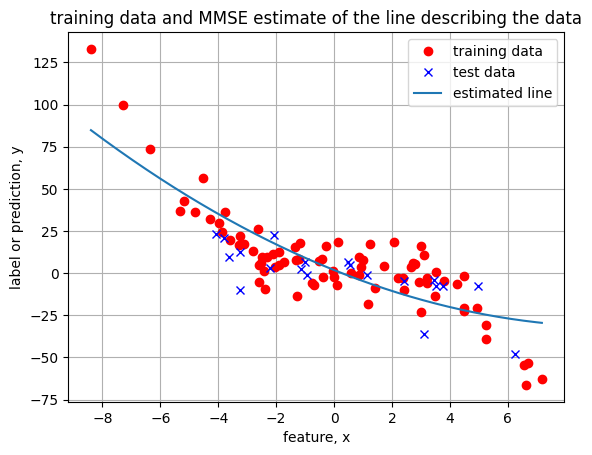

In [ ]:
# problem 1: p = 2
p = 2
X_poly = np.ones(N_tr)
for i in np.arange(p):
  X_poly = np.vstack((X_poly, np.power(x_tr, i+1)))
X_poly = np.transpose(X_poly)

w_ml = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_poly), X_poly)) , np.matmul(np.transpose(X_poly),y_tr))
print("w_ml: ", w_ml)
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy=0.
for i in np.arange(p+1):
  yy += w_ml[i]*np.power(xx, i)
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('feature, x')
plt.ylabel('label or prediction, y')
plt.title('training data and MMSE estimate of the line describing the data')

X_tr = np.ones(N_tr)
for i in np.arange(p):
  X_tr = np.vstack((X_tr, np.power(x_tr, i+1)))
X_tr = np.transpose(X_tr)
X_tst = np.ones(N_tst)
for i in np.arange(p):
  X_tst = np.vstack((X_tst, np.power(x_tst, i+1)))
X_tst = np.transpose(X_tst)
training_error = np.mean(np.square(np.matmul(X_tr,w_ml) - y_tr))
test_error = np.mean(np.square(np.matmul(X_tst,w_ml) - y_tst))
print('Error_training_data = ', training_error)
print('Error_Test_data = ', test_error)


w_ml:  [ 4.1650867  -1.18585499  0.15925893 -0.19822556]
Error_training_data =  87.58695633561258
Error_Test_data =  122.1837094942197


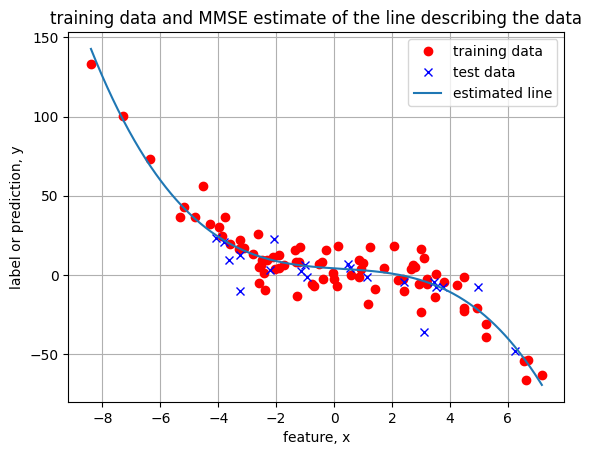

In [ ]:
# problem 1: p = 3
p = 3
X_poly = np.ones(N_tr)
for i in np.arange(p):
  X_poly = np.vstack((X_poly, np.power(x_tr, i+1)))
X_poly = np.transpose(X_poly)
w_ml = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_poly), X_poly)) , np.matmul(np.transpose(X_poly),y_tr))
print("w_ml: ", w_ml)
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy=0.
for i in np.arange(p+1):
  yy += w_ml[i]*np.power(xx, i)
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('feature, x')
plt.ylabel('label or prediction, y')
plt.title('training data and MMSE estimate of the line describing the data')

X_tr = np.ones(N_tr)
for i in np.arange(p):
  X_tr = np.vstack((X_tr, np.power(x_tr, i+1)))
X_tr = np.transpose(X_tr)
X_tst = np.ones(N_tst)
for i in np.arange(p):
  X_tst = np.vstack((X_tst, np.power(x_tst, i+1)))
X_tst = np.transpose(X_tst)
training_error = np.mean(np.square(np.matmul(X_tr,w_ml) - y_tr))
test_error = np.mean(np.square(np.matmul(X_tst,w_ml) - y_tst))
print('Error_training_data = ', training_error)
print('Error_Test_data = ', test_error)

w_ml:  [ 2.56035359 -1.00470033  0.48304873 -0.20862897 -0.00652276]
Error_training_data =  84.80020948702764
Error_Test_data =  128.56855395240157


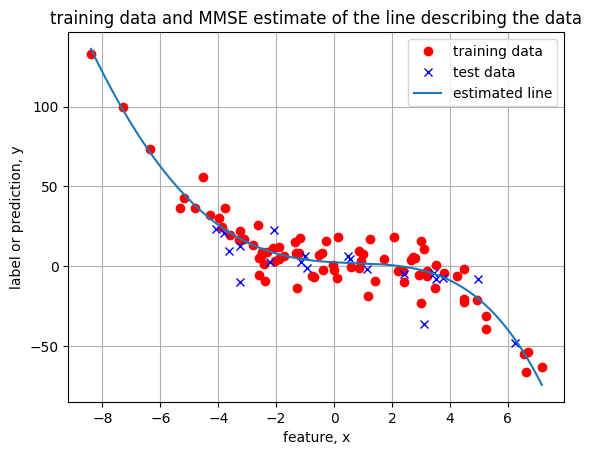

In [ ]:
# problem 1: p = 4

p = 4
X_poly = np.ones(N_tr)
for i in np.arange(p):
  X_poly = np.vstack((X_poly, np.power(x_tr, i+1)))
X_poly = np.transpose(X_poly)
w_ml = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_poly), X_poly)) , np.matmul(np.transpose(X_poly),y_tr))
print("w_ml: ",w_ml)
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy=0.
for i in np.arange(p+1):
  yy += w_ml[i]*np.power(xx, i)

plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('feature, x')
plt.ylabel('label or prediction, y')
plt.title('training data and MMSE estimate of the line describing the data')

X_tr = np.ones(N_tr)
for i in np.arange(p):
  X_tr = np.vstack((X_tr, np.power(x_tr, i+1)))
X_tr = np.transpose(X_tr)
X_tst = np.ones(N_tst)
for i in np.arange(p):
  X_tst = np.vstack((X_tst, np.power(x_tst, i+1)))
X_tst = np.transpose(X_tst)
training_error = np.mean(np.square(np.matmul(X_tr,w_ml) - y_tr))
test_error = np.mean(np.square(np.matmul(X_tst,w_ml) - y_tst))
print('Error_training_data = ', training_error)
print('Error_Test_data = ', test_error)

w_ml:  [ 3.68678802e+00 -3.14932540e-01 -8.72965308e-01 -1.42826334e-01
  2.39050312e-01 -1.47166681e-02 -1.38652084e-02  5.01266129e-04
  2.93248200e-04 -4.67274794e-06 -2.05508365e-06]
Error_training_data =  76.87650158373722
Error_Test_data =  157.83042117504164


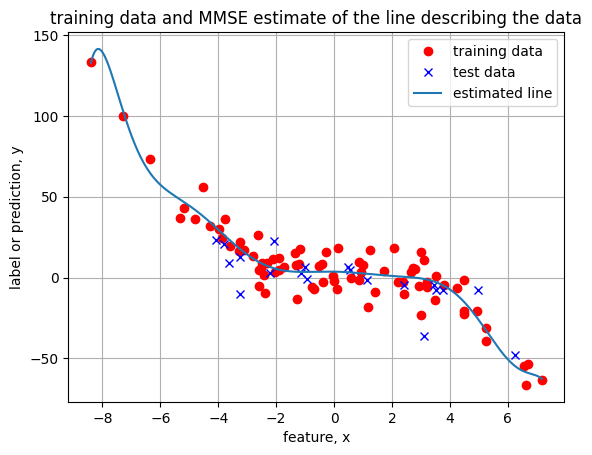

In [ ]:
# problem 1: p = 10
p = 10
X_poly = np.ones(N_tr)
for i in np.arange(p):
  X_poly = np.vstack((X_poly, np.power(x_tr, i+1)))
X_poly = np.transpose(X_poly)

w_ml = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_poly), X_poly)) , np.matmul(np.transpose(X_poly),y_tr))
print("w_ml: ", w_ml)
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy=0.
for i in np.arange(p+1):
  yy += w_ml[i]*np.power(xx, i)
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('feature, x')
plt.ylabel('label or prediction, y')
plt.title('training data and MMSE estimate of the line describing the data')

X_tr = np.ones(N_tr)
for i in np.arange(p):
  X_tr = np.vstack((X_tr, np.power(x_tr, i+1)))
X_tr = np.transpose(X_tr)
X_tst = np.ones(N_tst)
for i in np.arange(p):
  X_tst = np.vstack((X_tst, np.power(x_tst, i+1)))
X_tst = np.transpose(X_tst)
training_error = np.mean(np.square(np.matmul(X_tr,w_ml) - y_tr))
test_error = np.mean(np.square(np.matmul(X_tst,w_ml) - y_tst))
print('Error_training_data = ', training_error)
print('Error_Test_data = ', test_error)

# problem 2
# We choose p=3, because when p=2, the training data is obviously underfitting, when p=10, it is overfitting.
# Now we narrow it down to p=3 and p=4, as p=4 performs slightly better than p=3 on training data, but p=3 yields lower error on test data, which means it performs better on unknown data sets.
# So we choose p=3 as the optimal polynomial solution.